## Import neccessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

## Loading CSV file

In [19]:
dataset = pd.read_csv('Stroke_prediction.csv')

## Analyzing and pre-processing the data

In [20]:
#Checking for missing values
dataset.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [21]:
#Checking number of unique values in each column and presenting them in a table
unique_vals=[]

for col in dataset.columns:
    unival=dataset[col].nunique()
    unique_vals.append(unival)
    
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=dataset.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


#### Plotting categorical features using countplot

In [22]:
dataset.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

************************************************************************************************


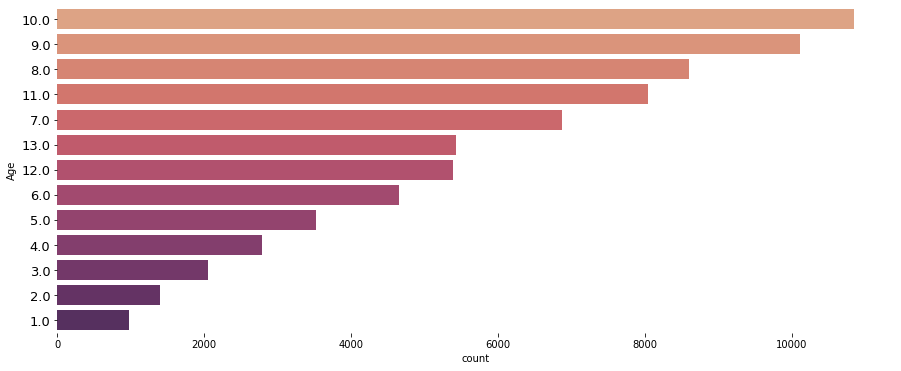

************************************************************************************************


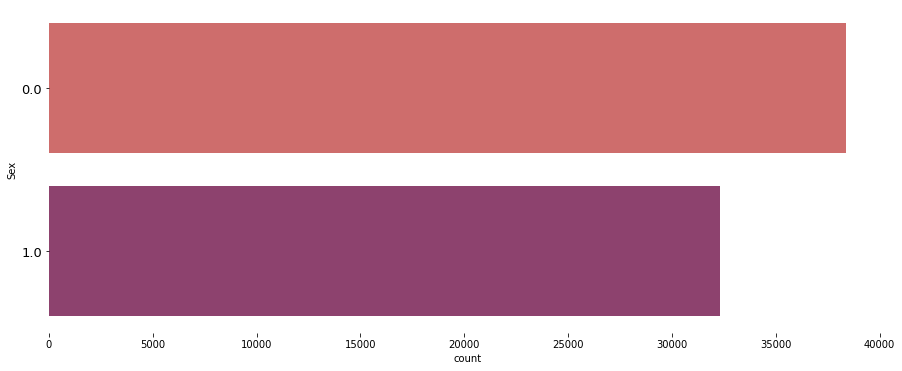

************************************************************************************************


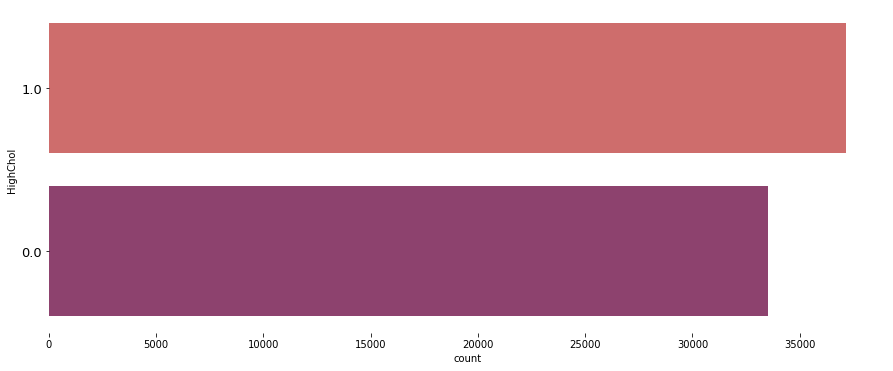

************************************************************************************************


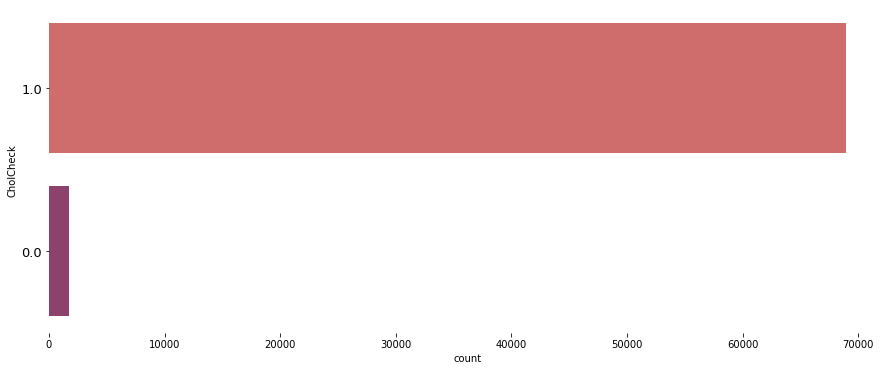

************************************************************************************************


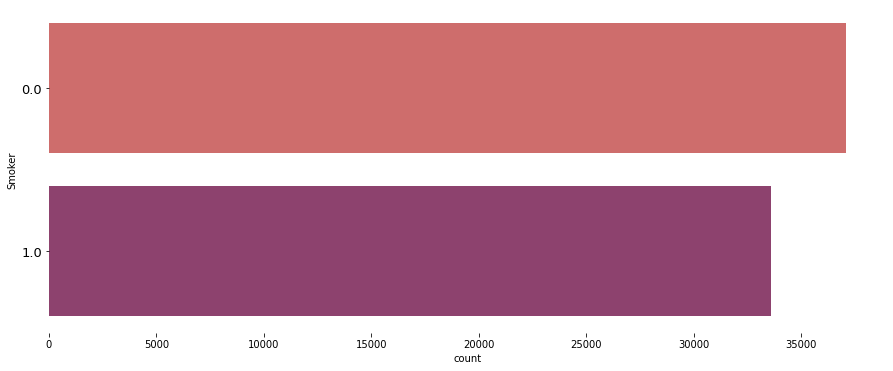

************************************************************************************************


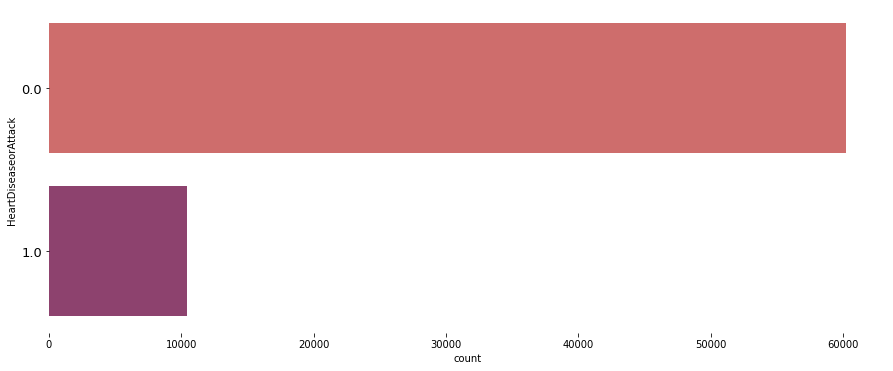

************************************************************************************************


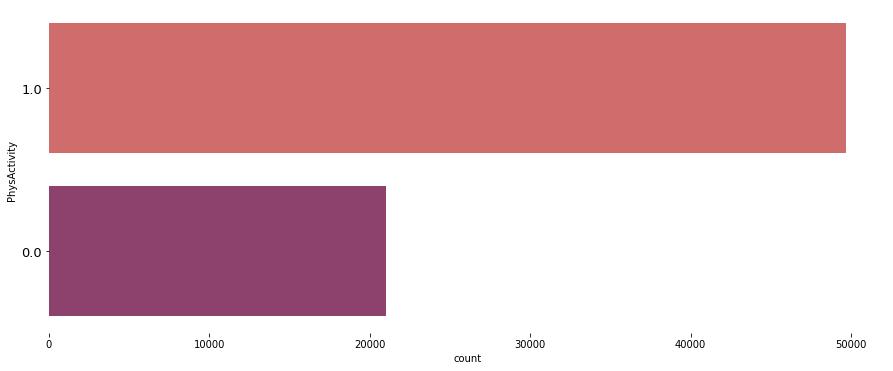

************************************************************************************************


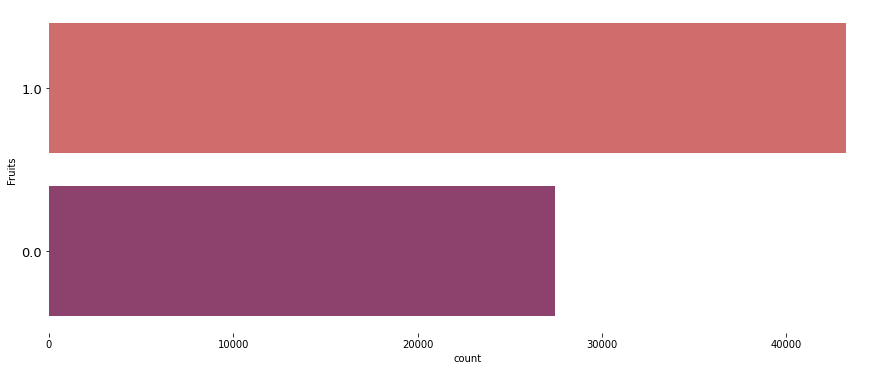

************************************************************************************************


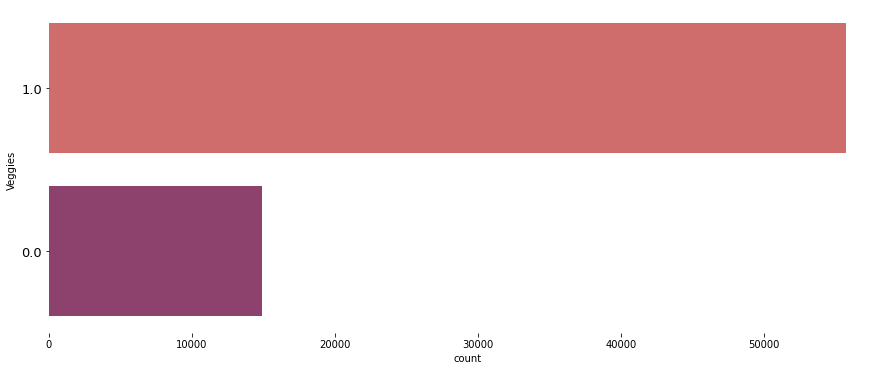

************************************************************************************************


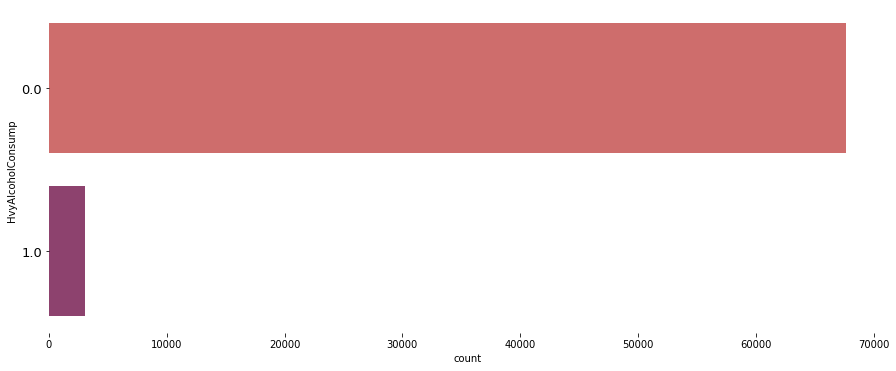

************************************************************************************************


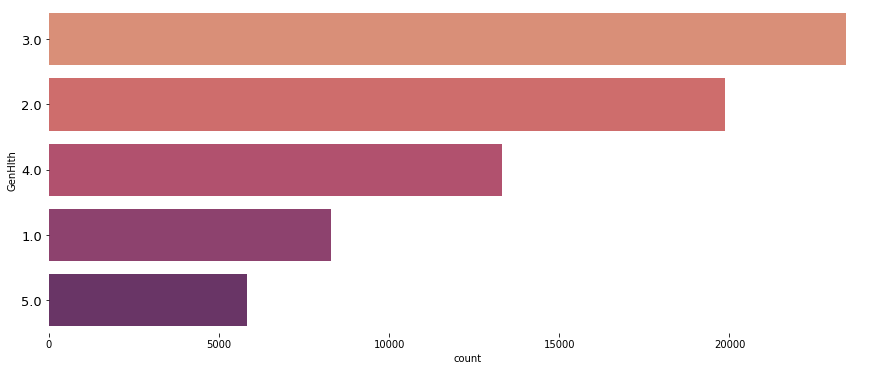

************************************************************************************************


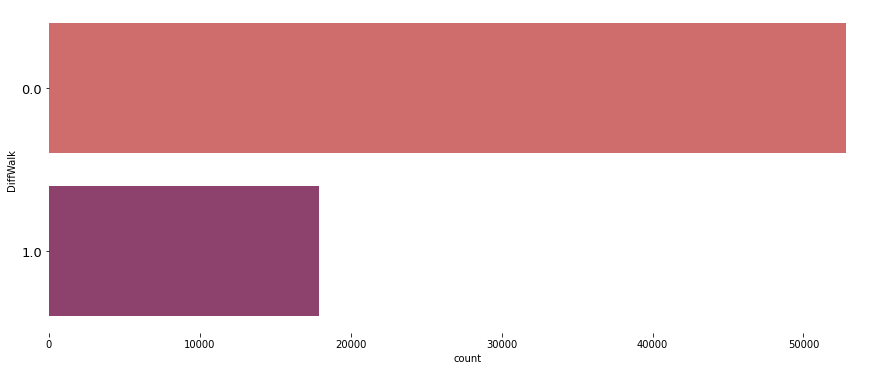

************************************************************************************************


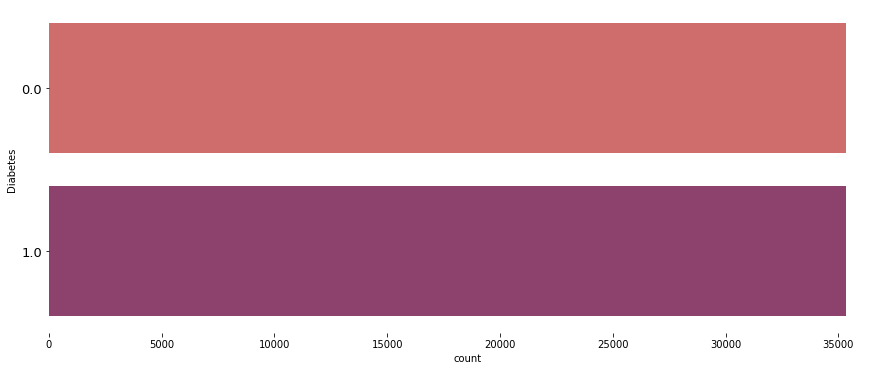

************************************************************************************************


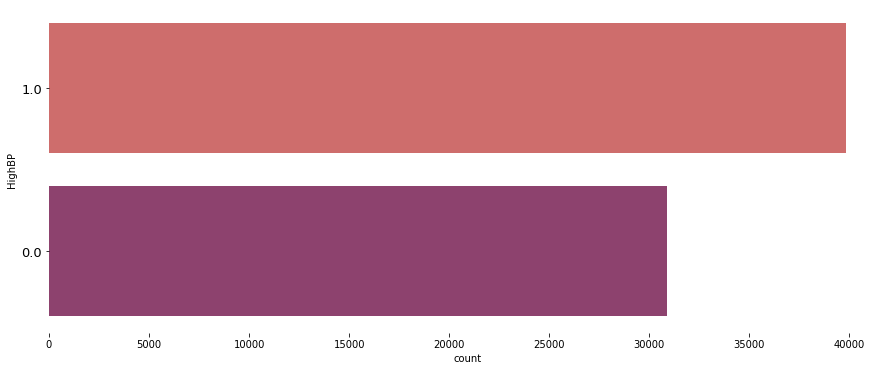

************************************************************************************************


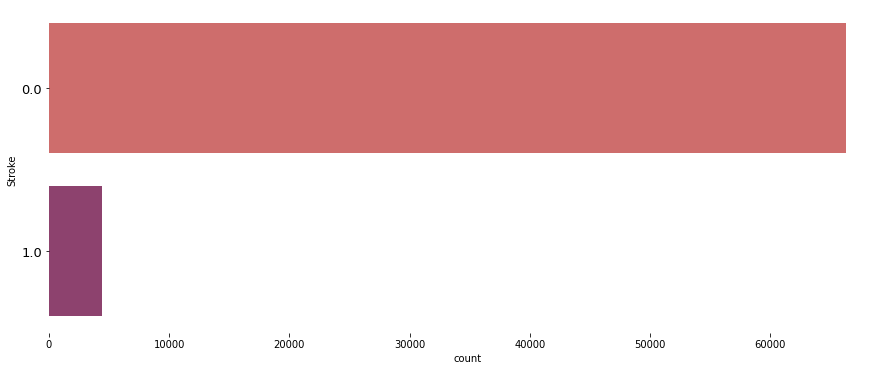

In [23]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = dataset[i],data=dataset, order=dataset[i].value_counts().index, palette='flare')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print("************************************************************************************************")
  plt.box(False)
  plt.show()

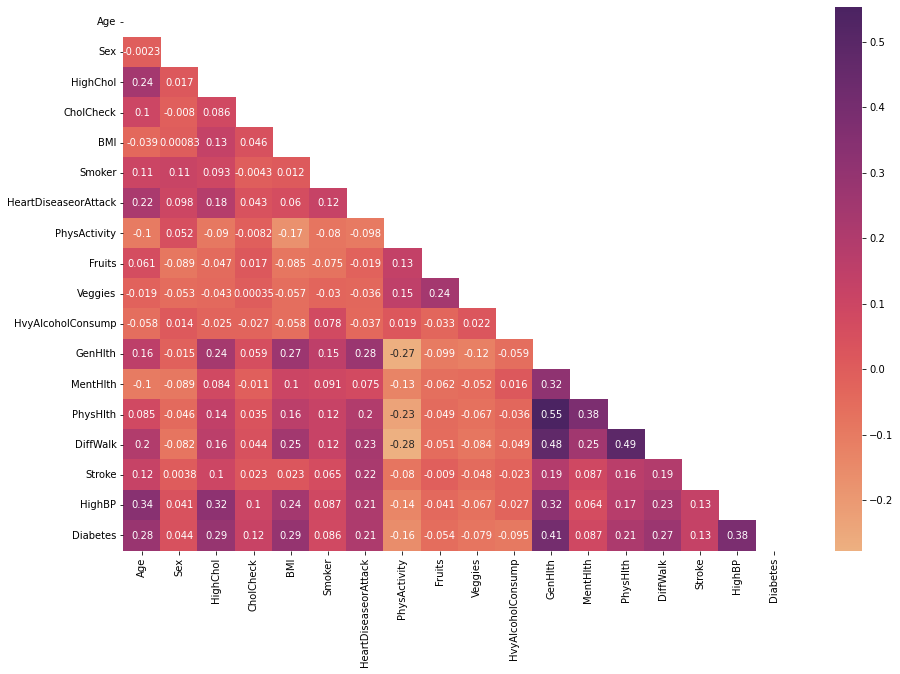

In [24]:
#Creating a heatmap using correlation to determine the unnecessary features
plt.figure(figsize=(15,10))
mask=np.triu(dataset.corr())
sns.heatmap(dataset.corr(),mask=mask,annot=True,cmap='flare')
plt.show()

In [25]:
#Dropping features that are unnecessary or that will skew/introduce bias to the model

data = dataset.drop (['Sex', 'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump'], axis=1)
data.head() 

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Splitting data features to target the 'Stroke' Feature
x=data.drop('Stroke',axis=1)
y=data['Stroke']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0, shuffle= True)
print(x_train.shape)
print(x_test.shape)

(49484, 11)
(21208, 11)


In [28]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
#Defining a function to simplify the testing process
def model_train_test(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, x_test, y_test)

## Testing Models

Logistic Regression

0.9357317993210109
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.36      0.00      0.01      1359

    accuracy                           0.94     21208
   macro avg       0.65      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


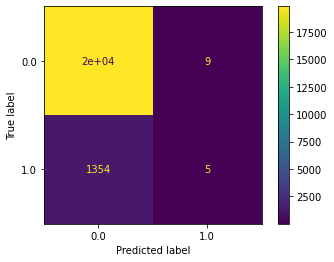

In [30]:
classifierLG = LogisticRegression()
model_train_test(classifierLG.fit(x_train, y_train))

Decision Tree

In [31]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [32]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}
Accuracy for our training dataset with tuning is : 93.86%


0.9359204073934364
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.00      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

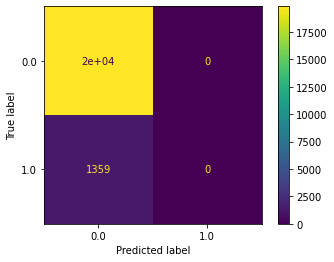

In [33]:
model_train_test(DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=2,max_features='auto'))

### Support Vector Machine

0.9359204073934364
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.00      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

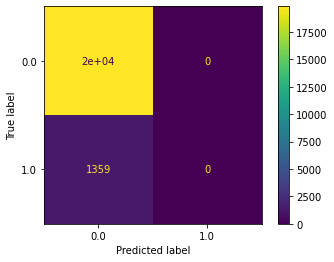

In [39]:
classifierSVM= SVC(C=1, kernel='linear')
model_train_test(classifierSVM.fit(x_train,y_train))

0.9359204073934364
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.00      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

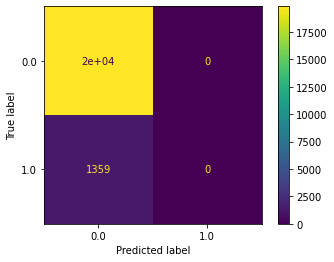

In [36]:
classifierSVM1= SVC(C=1, kernel='rbf', gamma=0.1)
model_train_test(classifierSVM1.fit(x_train,y_train))

0.9351188230856281
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.13      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.53      0.50      0.49     21208
weighted avg       0.88      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


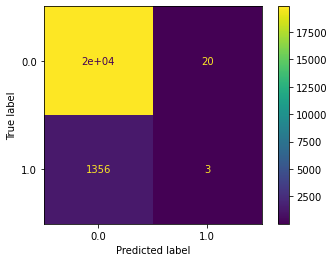

In [38]:
classifierSVM= SVC(C=1, kernel='rbf', gamma=0.5)
model_train_test(classifierSVM.fit(x_train,y_train))

0.934741606940777
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.18      0.01      0.01      1359

    accuracy                           0.93     21208
   macro avg       0.56      0.50      0.49     21208
weighted avg       0.89      0.93      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


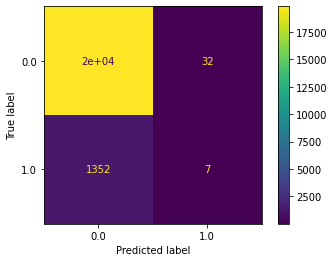

In [40]:
classifierSVM= SVC(C=1, kernel='rbf', gamma=0.8)
model_train_test(classifierSVM.fit(x_train,y_train))

0.9344586948321388
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.21      0.01      0.02      1359

    accuracy                           0.93     21208
   macro avg       0.57      0.50      0.49     21208
weighted avg       0.89      0.93      0.91     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


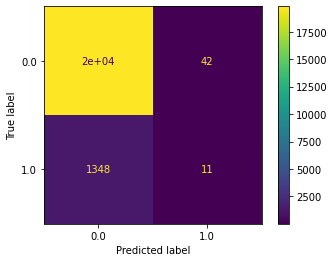

In [42]:
classifierSVM= SVC(C=1, kernel='rbf', gamma=1)
model_train_test(classifierSVM.fit(x_train,y_train))

0.9359204073934364
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.00      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

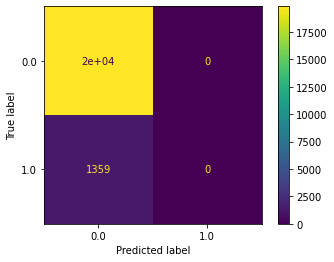

In [43]:
classifierSVM= SVC(C=0.1, kernel='rbf', gamma=1)
model_train_test(classifierSVM.fit(x_train,y_train))

0.9356846473029046
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19849
         1.0       0.14      0.00      0.00      1359

    accuracy                           0.94     21208
   macro avg       0.54      0.50      0.48     21208
weighted avg       0.89      0.94      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


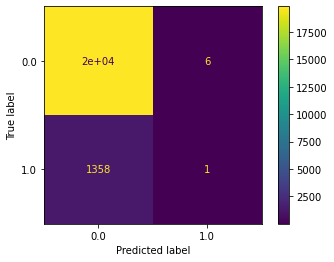

In [44]:
classifierSVM= SVC(C=0.5, kernel='rbf', gamma=1)
model_train_test(classifierSVM.fit(x_train,y_train))

Bernoulli Naive Bayes

0.8891927574500189
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19849
         1.0       0.23      0.32      0.27      1359

    accuracy                           0.89     21208
   macro avg       0.59      0.62      0.61     21208
weighted avg       0.91      0.89      0.90     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


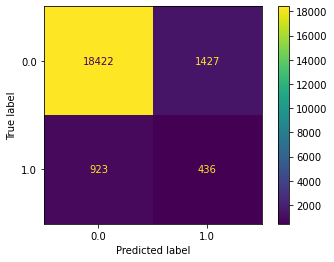

In [16]:
classifierBNB=BernoulliNB()
model_train_test(classifierBNB)

Gaussian Naive Bayes

0.8425122595247077
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19849
         1.0       0.20      0.48      0.28      1359

    accuracy                           0.84     21208
   macro avg       0.58      0.67      0.60     21208
weighted avg       0.91      0.84      0.87     21208



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


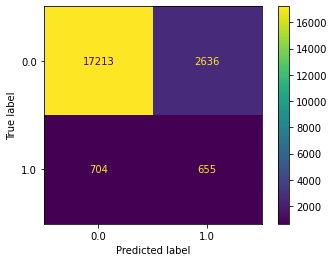

In [17]:
classifierGNB= GaussianNB()
model_train_test(classifierGNB)